In [ ]:
import os
import zipfile
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load & extract dataset

local_zip = '/content/drive/MyDrive/datasets/gender_dataset_face.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/GenderFaces')
zip_ref.close()

In [ ]:
source_path = '/tmp/GenderFaces'

source_path_man = os.path.join(source_path, 'man')
source_path_woman = os.path.join(source_path, 'woman')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_man))} images of men.")
print(f"There are {len(os.listdir(source_path_woman))} images of women.")

There are 9600 images of men.
There are 9600 images of women.


In [ ]:
# Define root directory
root_dir = '/tmp/gender-faces'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# declare function to create training & validation directory
def create_train_val_dirs(root_path):

  os.makedirs(os.path.join(root_path, 'training'))
  os.makedirs(os.path.join(root_path, 'testing'))
  os.makedirs(os.path.join(root_path + '/training', 'men'))
  os.makedirs(os.path.join(root_path + '/training', 'women'))
  os.makedirs(os.path.join(root_path + '/testing', 'men'))
  os.makedirs(os.path.join(root_path + '/testing', 'women'))

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
# Test create_train_val_dirs function
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/tmp/gender-faces/training
/tmp/gender-faces/testing
/tmp/gender-faces/training/women
/tmp/gender-faces/training/men
/tmp/gender-faces/testing/women
/tmp/gender-faces/testing/men


In [ ]:
# Define paths
MEN_SOURCE_DIR = "/tmp/GenderFaces/man/"
WOMEN_SOURCE_DIR = "/tmp/GenderFaces/woman/"

TRAINING_DIR = "/tmp/gender-faces/training/"
TESTING_DIR = "/tmp/gender-faces/testing/"

TRAINING_MEN_DIR = os.path.join(TRAINING_DIR, "men/")
TESTING_MEN_DIR = os.path.join(TESTING_DIR, "men/")

TRAINING_WOMEN_DIR = os.path.join(TRAINING_DIR, "women/")
TESTING_WOMEN_DIR = os.path.join(TESTING_DIR, "women/")

In [ ]:
# Split Data
def split_data(source_dir, training_dir, testing_dir, split_size):

  list_files = []
  for filename in os.listdir(source_dir):
    file = source_dir + filename
    if os.path.getsize(file) > 0:
        list_files.append(filename)
    else:
        print(filename + " is zero length, so ignoring.")

  training_length = int(len(list_files) * split_size)
  test_length = int(len(list_files) - training_length)
  shuffled = random.sample(list_files, len(list_files))
  training_set = shuffled[0:training_length]
  test_set = shuffled[-test_length:]

  for filename in training_set:
    this_file = source_dir + filename
    destination = training_dir + filename
    copyfile(this_file, destination)

  for filename in test_set:
    this_file = source_dir + filename
    destination = testing_dir + filename
    copyfile(this_file, destination)


# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_MEN_DIR)) > 0:
  for file in os.scandir(TRAINING_MEN_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_WOMEN_DIR)) > 0:
  for file in os.scandir(TRAINING_WOMEN_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_MEN_DIR)) > 0:
  for file in os.scandir(TESTING_MEN_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_WOMEN_DIR)) > 0:
  for file in os.scandir(TESTING_WOMEN_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = 0.8

split_data(MEN_SOURCE_DIR, TRAINING_MEN_DIR, TESTING_MEN_DIR, split_size)
split_data(WOMEN_SOURCE_DIR, TRAINING_WOMEN_DIR, TESTING_WOMEN_DIR, split_size)

# check original data size
print(f"Original men directory has {len(os.listdir(MEN_SOURCE_DIR))} images")
print(f"Original women directory has {len(os.listdir(WOMEN_SOURCE_DIR))} images\n")

# check Training and testing directory size
print(f"There are {len(os.listdir(TRAINING_MEN_DIR))} images of men for training")
print(f"There are {len(os.listdir(TRAINING_WOMEN_DIR))} images of women for training")
print(f"There are {len(os.listdir(TESTING_MEN_DIR))} images of men for testing")
print(f"There are {len(os.listdir(TESTING_WOMEN_DIR))} images of women for testing")

Original men directory has 9600 images
Original women directory has 9600 images

There are 7680 images of men for training
There are 7680 images of women for training
There are 1920 images of men for testing
There are 1920 images of women for testing


In [ ]:
# Data Augmentation with ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

# Pass in the appropriate arguments to the flow_from_directory method
train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

# Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
testing_datagen = ImageDataGenerator(rescale=1./255)

# Pass in the appropriate arguments to the flow_from_directory method
testing_generator = testing_datagen.flow_from_directory(directory=TESTING_DIR,
                                                              batch_size=20,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 15360 images belonging to 2 classes.
Found 3840 images belonging to 2 classes.


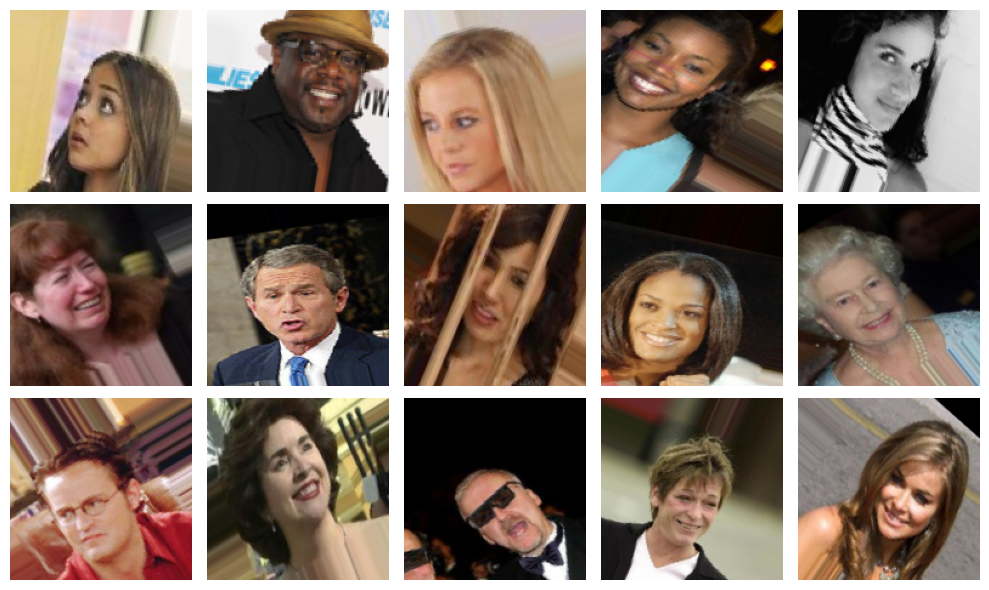

In [ ]:
images, labels = next(train_generator)

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()

for i in range(15):
    axes[i].imshow(images[i])
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('augmented.png')
plt.show()

In [ ]:
# Create model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
hasil = model.fit(train_generator,
                  steps_per_epoch=len(train_generator),
                  epochs=15,
                  validation_data=testing_generator,
                  validation_steps=len(testing_generator),
                  verbose=1)

Epoch 1/15
768/768 [==============================] - 122s 160ms/step - loss: 0.3773 - accuracy: 0.8230 - val_loss: 0.3174 - val_accuracy: 0.8620
Epoch 2/15
768/768 [==============================] - 119s 155ms/step - loss: 0.3601 - accuracy: 0.8354 - val_loss: 0.3357 - val_accuracy: 0.8419
Epoch 3/15
768/768 [==============================] - 118s 154ms/step - loss: 0.3463 - accuracy: 0.8425 - val_loss: 0.3461 - val_accuracy: 0.8453
Epoch 4/15
768/768 [==============================] - 121s 158ms/step - loss: 0.3307 - accuracy: 0.8530 - val_loss: 0.2889 - val_accuracy: 0.8815
Epoch 5/15
768/768 [==============================] - 119s 154ms/step - loss: 0.3220 - accuracy: 0.8546 - val_loss: 0.2906 - val_accuracy: 0.8789
Epoch 6/15
768/768 [==============================] - 119s 154ms/step - loss: 0.3054 - accuracy: 0.8640 - val_loss: 0.2764 - val_accuracy: 0.8826
Epoch 7/15
768/768 [==============================] - 118s 154ms/step - loss: 0.3041 - accuracy: 0.8668 - val_loss: 0.2898 -

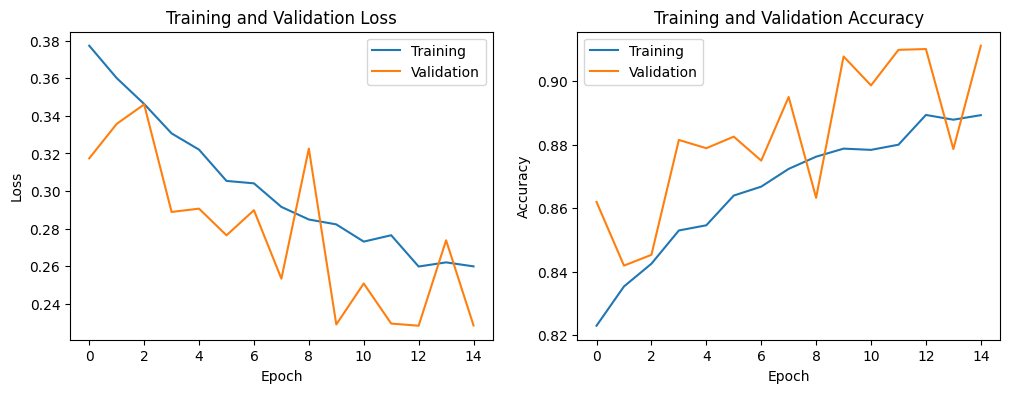

Best Model: Min Training Loss = 0.260, Min Validation Loss = 0.228
Best Model: Max Training Acc = 0.889, Max Validation Acc = 0.911


In [ ]:
# plot training/validation loss/accuracy
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

loss = hasil.history['loss']
val_loss = hasil.history['val_loss']
acc = hasil.history['accuracy']
val_acc = hasil.history['val_accuracy']

# Get number of epochs
epochs = range(len(loss))

# Plot training and validation loss per epoch
axs[0].plot(epochs, loss)
axs[0].plot(epochs, val_loss)
legend_drawn_flag = True
axs[0].legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')

# Plot training and validation accuracy per epoch
axs[1].plot(epochs, acc)
axs[1].plot(epochs, val_acc)
axs[1].legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')

plt.show()

print('Best Model: Min Training Loss = {:.3f}, Min Validation Loss = {:.3f}'
      .format(min(loss), min(val_loss)))
print('Best Model: Max Training Acc = {:.3f}, Max Validation Acc = {:.3f}'
      .format(max(acc), max(val_acc)))

In [ ]:
model.save('model-pi.h5')